# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [17]:
import numpy as np
import pandas as pd
import matplotlib as plt


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [18]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [19]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df['AVG_MATH_4_SCORE'] = imputer.fit_transform(df[['AVG_MATH_4_SCORE']])
df = df.dropna(subset=['AVG_MATH_4_SCORE'])
df = df.dropna(subset=['PRIMARY_KEY'])
df = df.dropna(subset=['STATE'])
df = df.dropna(subset=['YEAR'])

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [20]:
print(df["YEAR"].unique())

[1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 1986 1987 1988
 1989 1990 1991 2017 2019]


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [21]:
michigan_mean = df[df['STATE'] == 'MICHIGAN']['AVG_MATH_4_SCORE'].mean()
ohio_mean = df[df['STATE'] == 'OHIO']['AVG_MATH_4_SCORE'].mean()

if michigan_mean > ohio_mean:
    answer = "Michigan has the higher average test score across all years."
elif ohio_mean > michigan_mean:
    answer = "Ohio has the higher average test score across all years."
else:
    answer = "Michigan and Ohio have the same average test score across all years."

michigan_mean, ohio_mean, answer

(236.78787878787878,
 238.4848484848485,
 'Ohio has the higher average test score across all years.')

Find the average for your chosen test across all states in 2019

In [22]:
df_2019 = df[df['YEAR'] == 2019]
average_scores_by_state = df_2019.groupby('STATE')['AVG_MATH_4_SCORE']
overall_average_2019 = df_2019['AVG_MATH_4_SCORE'].mean()

For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [23]:
max_scores_by_state = df.groupby('STATE')['AVG_MATH_4_SCORE'].max().reset_index()

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [24]:
#Given the total expenditure and enrollment (number of students), one can calculate the expenditure per student 
#It might provide insights into how much investment is made per student in each state.
df['expenditure_per_student'] = df['TOTAL_EXPENDITURE'] / df['ENROLL']

#If someone's interested in changes in student performance over time
#Calculate the difference in average test scores from one year to the next as a new feature.
df.sort_values(by=['STATE', 'YEAR'], inplace=True)
df['math_4_score_diff'] = df.groupby('STATE')['AVG_MATH_4_SCORE'].diff()
df['reading_4_score_diff'] = df.groupby('STATE')['AVG_READING_4_SCORE'].diff()
#The proportion of the total expenditure spent on instruction might be a good indicator 
#..of how resources are allocated towards direct education versus administration or other costs.

df['instructional_expenditure_proportion'] = df['INSTRUCTION_EXPENDITURE'] / df['TOTAL_EXPENDITURE']

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

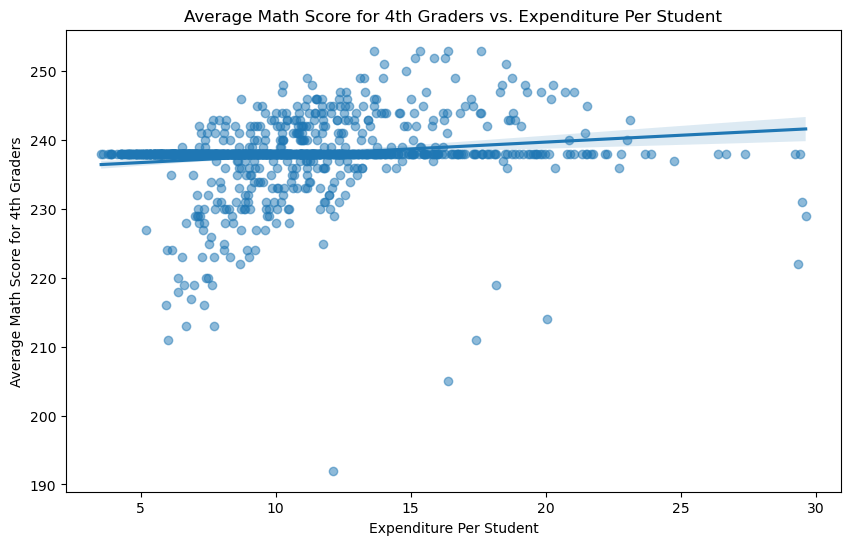

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.regplot(x='expenditure_per_student', y='AVG_MATH_4_SCORE', data=df, scatter_kws={'alpha':0.5})
plt.title('Average Math Score for 4th Graders vs. Expenditure Per Student')
plt.xlabel('Expenditure Per Student')
plt.ylabel('Average Math Score for 4th Graders')
plt.show()

**<CAPTION FOR VIZ 1>**! Run the code and it's above

**Visualization 2**

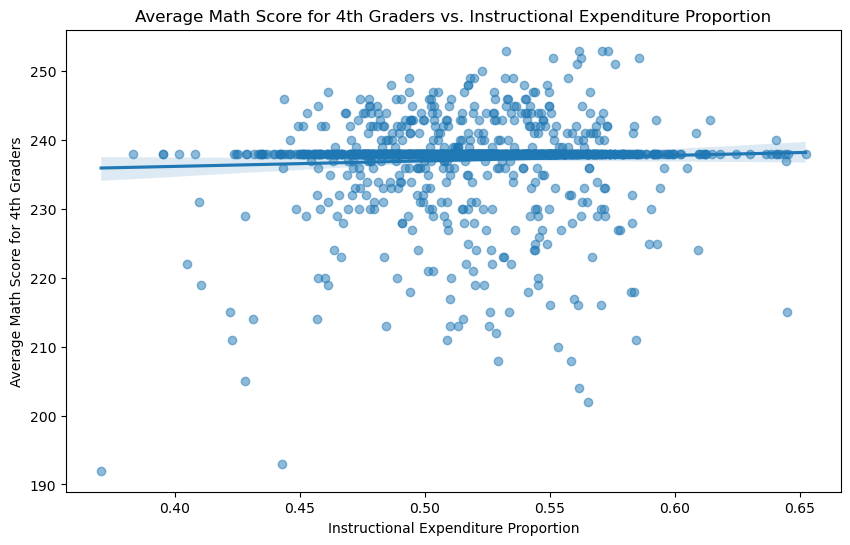

In [26]:
plt.figure(figsize=(10, 6))
sns.regplot(x='instructional_expenditure_proportion', y='AVG_MATH_4_SCORE', data=df, scatter_kws={'alpha':0.5})
plt.title('Average Math Score for 4th Graders vs. Instructional Expenditure Proportion')
plt.xlabel('Instructional Expenditure Proportion')
plt.ylabel('Average Math Score for 4th Graders')
plt.show()

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X = df.drop(['AVG_MATH_4_SCORE', 'PRIMARY_KEY', 'STATE', 'YEAR'], axis=1) 
y = df['AVG_MATH_4_SCORE']

In [60]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [61]:
# import your sklearn class here

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [62]:
# create your model here

imputer = SimpleImputer(strategy='median')
model = LogisticRegression()

In [63]:
model.fit(X_train, y_train)
pipeline = make_pipeline(imputer, model)

pipeline.fit(X_train, y_train)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [64]:
imputer = SimpleImputer(strategy='median')
model = LogisticRegression()
model.fit(X_train, y_train)
pipeline = make_pipeline(imputer, model)

pipeline.fit(X_train, y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [67]:

pipeline = make_pipeline(imputer, model)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

/Users/crakeee/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

/Users/crakeee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

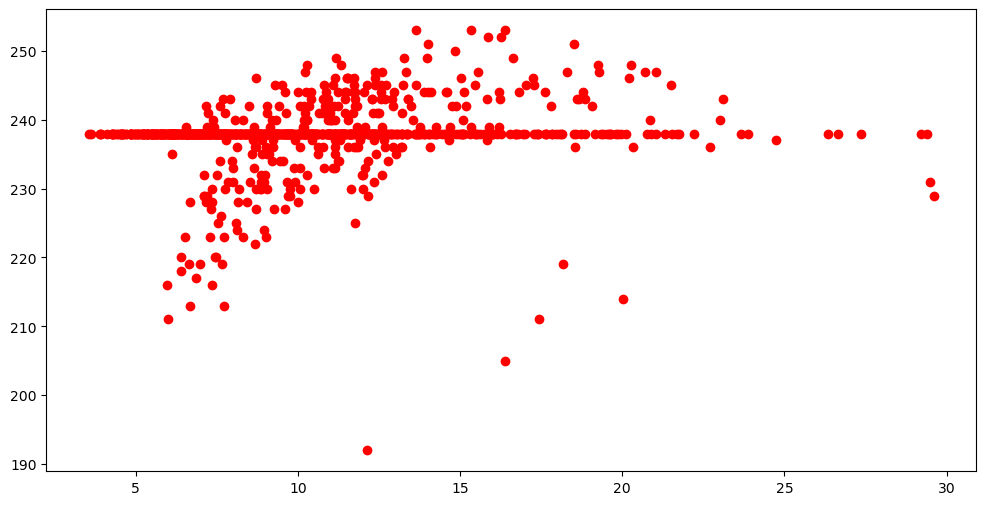

In [68]:
col_name = 'expenditure_per_student'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior On Training Set")

/Users/crakeee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

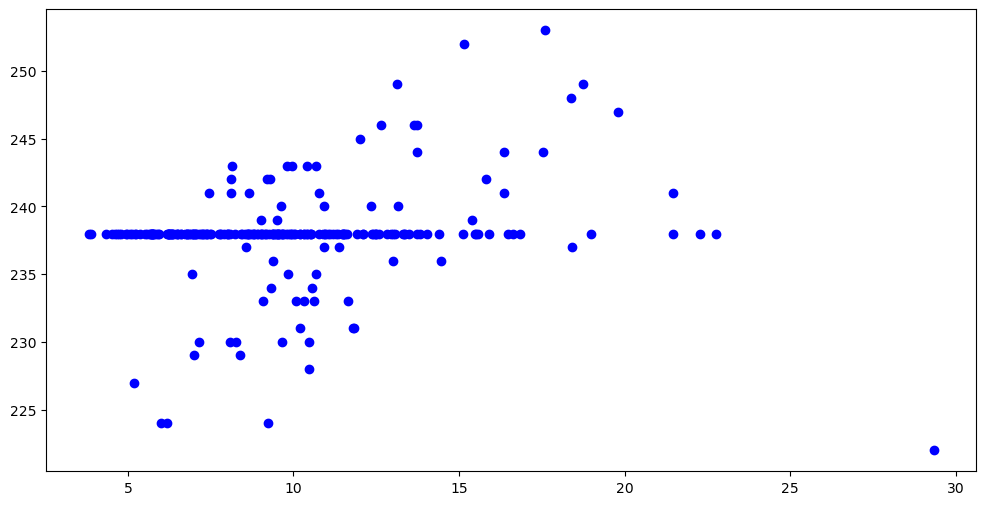

In [69]:
col_name = 'expenditure_per_student'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**

In [70]:
#In this project, we analyzed a dataset to predict 4th graders' average math scores using features like 'expenditure_per_student' and 'instructional_expenditure_proportion'. After feature engineering and exploratory data analysis, we used a Logistic Regression model for prediction. The model was trained and tested, and its performance was evaluated through visualizations comparing actual and predicted scores. These visualizations helped assess how well the model captured the relationship between financial investment in education and student performance, providing valuable insights into the impact of educational expenditures on student outcomes.